# Beyond Hello World - Computer Vision

Writing rules for problems in computer vision, such as image recognition, object detection is much more difficult and here is where the rule learning monsters aka neural networks have their advantage. 
* Neural networks are still not so good on tabular data, as compared to algorithms like XGBoost. But there have been developments [TabNets](https://towardsdatascience.com/tabnet-deep-neural-network-for-structured-tabular-data-39eb4b27a9e4)

In [ ]:
%load_ext autoreload 
%autoreload 2

## Install `tfutils`


In [ ]:
!pip install -e /content/drive/MyDrive/projects/tfutils

Obtaining file:///content/drive/MyDrive/projects/tfutils
  Running setup.py develop for tfutils


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


## Check GPU

In [ ]:
!nvidia-smi

Thu Jul 22 06:50:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    31W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Load MNIST data

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print('train: ', train_data.shape, train_labels.shape)
print('test: ', test_data.shape, test_labels.shape)

train:  (60000, 28, 28) (60000,)
test:  (10000, 28, 28) (10000,)


Maximum and minimum pixel value

In [ ]:
train_data.min(), train_data.max() 

(0, 255)

Number of unique classes

In [ ]:
cls_labels = np.unique(train_labels)
cls_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
CLASS_NAMES = dict(zip(cls_labels, ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']))

CLASS_NAMES

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [ ]:
N_CLASSES = len(cls_labels)
N_CLASSES

10

* So we have 60000 images in train and 10000 images in test
* The dimensions of the image are all (28, 28) pixels grayscale 8bit images (0-255 intensity)
* We have ten classes with labels 0-9


|label |name |
|--|--|
|0| T-shirt/top|
|1| Trouser|
|2| Pullover|
|3| Dress|
|4| Coat|
|5| Sandal|
|6| Shirt|
|7| Sneaker|
|8| Bag|
|9:| Ankle boot|

In [ ]:
# Scaling the images
train_data = train_data/255.0
test_data = test_data/255.0 

### Store the models

In [ ]:
tfmodels = {}

In [ ]:
from tensorflow.keras import layers, optimizers, callbacks

## Some Global Parameters

In [ ]:
N_CLASSES = 10
INPUT_SHAPE = (28, 28)

## Define a simple Dense model

In [ ]:
model_name = 'simple-dense-1layer'

In [ ]:
model = tf.keras.Sequential([
    layers.InputLayer(input_shape=INPUT_SHAPE),
    layers.Flatten(),
    layers.Dense(128, activation=tf.nn.relu),
    layers.Dense(N_CLASSES, activation='softmax')
], name=model_name)

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(), metrics=['accuracy'])
model.summary()

Model: "simple-dense-1layer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_27 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_data, train_labels, batch_size=32, epochs=10)
tfmodels[model_name] = model

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4992 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3745 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3381 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3120 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2964 - accuracy: 0.8904
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2786 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2685 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2579 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2476 - accuracy: 0.9070
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

### Learning Curve

In [ ]:
from tfutils.visualize import plot_learning_curve

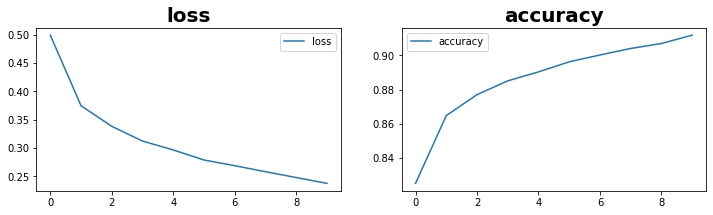

In [ ]:
plot_learning_curve(history, extra_metric='accuracy');

In [ ]:
model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3483 - accuracy: 0.8780


[0.3482585549354553, 0.878000020980835]

Around 88% accuracy

# Exploration Exercises

## Exercise 1: Predicted softmax probabilities

In [ ]:
pred_probs = model.predict(test_data[0:1])
pred_probs

array([[1.07333186e-07, 1.88341503e-14, 1.01457740e-11, 1.56010139e-15,
        1.31847799e-09, 8.15418363e-03, 4.34624531e-10, 3.59848179e-02,
        1.11845020e-06, 9.55859780e-01]], dtype=float32)

In [ ]:
pred_probs.shape

(1, 10)

* We have 10 softmax probabilities for each of the 10 classes
* We take the highest probability corresponds to the actual predicted class

In [ ]:
pred_labs = pred_probs.argmax(axis=1)
pred_labs

array([9])

In [ ]:
pred_clsnames = pd.Series(pred_labs).map(CLASS_NAMES).to_numpy()
pred_clsnames

array(['Ankle boot'], dtype=object)

### Exercise 2: Effect of Increasing Neurons

In [ ]:
model_name = 'simple-dense-1layer-med'

In [ ]:
model = tf.keras.Sequential([
    layers.InputLayer(input_shape=INPUT_SHAPE),
    layers.Flatten(),
    layers.Dense(1024, activation=tf.nn.relu),
    layers.Dense(10, activation=tf.nn.softmax)
], name=model_name)

model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

Model: "simple-dense-1layer-med"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_29 (Dense)             (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_data, train_labels, batch_size=32, epochs=10)
tfmodels[model_name] = model

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4744 - accuracy: 0.8302
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3562 - accuracy: 0.8689
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3208 - accuracy: 0.8828
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2934 - accuracy: 0.8907
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2763 - accuracy: 0.8976
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2620 - accuracy: 0.9022
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2485 - accuracy: 0.9068
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2386 - accuracy: 0.9096
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2271 - accuracy: 0.9149
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.220

### Evaluate on test Data

In [ ]:
model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3381 - accuracy: 0.8865


[0.3381320536136627, 0.8865000009536743]

### Question 1. Increase to 1024 Neurons -- What's the impact?
1. Training takes longer, but is more accurate
2. Training takes longer, but no impact on accuracy
3. Training takes the same time, but is more accurate


**Answer**: It's a little bit more accurate, but the time taken per epoch has increased very slightly (not too much).

### Learning Curve

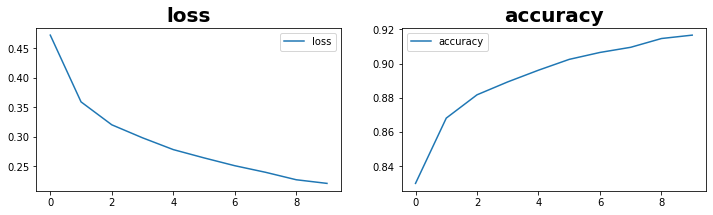

In [ ]:
plot_learning_curve(history, extra_metric='accuracy');

## Exercise 3: Removing the Flatten Layer

In [ ]:
model_name = 'simple-dense-no-flatten'

In [ ]:
model = tf.keras.Sequential([
    layers.Dense(128, input_shape=INPUT_SHAPE, activation=tf.nn.relu),
    layers.Dense(N_CLASSES, activation=tf.nn.softmax)
], name=model_name)

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(), 
              metrics=['accuracy'])

model.summary()

Model: "simple-dense-no-flatten"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 28, 128)           3712      
_________________________________________________________________
dense_9 (Dense)              (None, 28, 10)            1290      
Total params: 5,002
Trainable params: 5,002
Non-trainable params: 0
_________________________________________________________________


In [ ]:
try:
    history = model.fit(train_data, train_labels, epochs=5)
except Exception as e:
    print(e)

Epoch 1/5
in user code:

    /usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:855 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:838 run_step  **
        outputs = model.tra

We get a `ValueError` exception because of shape mismatch. But if we try to predict, it still works (we can predict as model has randomly initialized weights)

In [ ]:
model.predict(test_data[0:50]).shape

(50, 28, 10)

Here is what is happening:
* It takes the first 50 images of size 28*28 as input
* It considers each row (nrows=28) as a separate data point with ncol features (ncol=28), and predicts the probabilities for each (10)
* It does so, since it is a dense model and cannot really percieve 2D inputs

## Exercise 4: Change output to something different than `N_CLASSES`

### Case 1: More Output neurons than actual

In [ ]:
model_name = 'simple-dense-big-output-shape'

In [ ]:
model = tf.keras.Sequential([
    layers.InputLayer(input_shape=INPUT_SHAPE),
    layers.Flatten(),
    layers.Dense(128, activation=tf.nn.relu),
    layers.Dense(N_CLASSES+5, activation=tf.nn.softmax)
], name=model_name)

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(), 
              metrics=['accuracy'])
model.summary()

Model: "simple-dense-big-output-shape"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_23 (Dense)             (None, 15)                1935      
Total params: 102,415
Trainable params: 102,415
Non-trainable params: 0
_________________________________________________________________


In [ ]:
try:
    history = model.fit(train_data, train_labels, epochs=5)
except Exception as e:
    print(e)
    

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4959 - accuracy: 0.8275
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3751 - accuracy: 0.8639
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3371 - accuracy: 0.8775
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3120 - accuracy: 0.8858
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2977 - accuracy: 0.8898


In [ ]:
preds = model.predict(test_data)
preds.shape

(10000, 15)

In [ ]:
np.unique(preds.argmax(axis=1), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1008,  953, 1195, 1033,  926,  972,  899, 1102,  978,  934]))

* Seems like it never really predicts anything over the 10th category!
* This is expected because are labels are integers and not ohe, and hence we are using sparse_categorical_crossentropy. So there really is no output shape mismatch. There just aren't any data points with labels > 9

### Case 2: Less Output Neurons than actual

In [ ]:
model_name = 'simple-dense-small-output-shape'

In [ ]:
model = tf.keras.Sequential([
    layers.InputLayer(input_shape=INPUT_SHAPE),
    layers.Flatten(),
    layers.Dense(128, activation=tf.nn.relu),
    layers.Dense(N_CLASSES-5, activation=tf.nn.softmax)
], name=model_name)

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(), 
              metrics=['accuracy'])
model.summary()

Model: "simple-dense-small-output-shape"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 645       
Total params: 101,125
Trainable params: 101,125
Non-trainable params: 0
_________________________________________________________________


In [ ]:
try:
    history = model.fit(train_data, train_labels, epochs=5)
except Exception as e:
    print(e)
    

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.1000
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.1000
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.1000
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.1000
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.1000


In [ ]:
preds = model.predict(test_data)
preds.shape

(10000, 5)

In [ ]:
np.unique(preds.argmax(axis=1), return_counts=True)

(array([0]), array([10000]))

* The model is unable to learn as the loss is `nan`, plus all test data points are just predicted as the 0th class

## Exercise 5: Bigger model (2 layer)


In [ ]:
model_name = 'simple-dense-2layer'

model = tf.keras.Sequential([
    layers.InputLayer(input_shape=INPUT_SHAPE),
    layers.Flatten(),
    layers.Dense(512, activation=tf.nn.relu),
    layers.Dense(256, activation=tf.nn.relu),
    layers.Dense(N_CLASSES, activation=tf.nn.softmax)
], name=model_name)

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "simple-dense-2layer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_31 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_32 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_data, train_labels, batch_size=32, epochs=10)
tfmodels[model_name] = model

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4682 - accuracy: 0.8299
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3571 - accuracy: 0.8679
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3204 - accuracy: 0.8816
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2961 - accuracy: 0.8898
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2784 - accuracy: 0.8957
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2641 - accuracy: 0.9002
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2494 - accuracy: 0.9040
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2398 - accuracy: 0.9086
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2286 - accuracy: 0.9133
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.217

### Evaluate

In [ ]:
model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3447 - accuracy: 0.8830


[0.3446640968322754, 0.8830000162124634]

### Plot learning curve

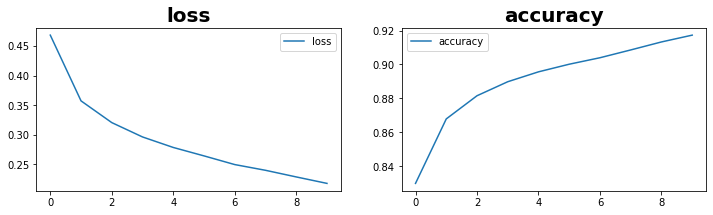

In [ ]:
plot_learning_curve(history, extra_metric='accuracy');

* We don't get much improvement, as this is a relatively simple data. 

### Exercise 6: Training for more epochs

Let's take the previous model and train it for longer, say 30 epochs.

In [ ]:
model_name_orig = 'simple-dense-2layer'
model_name = f'{model_name_orig}-longer-epochs'

In [ ]:
# Clone
model = tf.keras.models.clone_model(tfmodels[model_name_orig])

# Recompile
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(), 
              metrics=['accuracy'])

# Summary
model.summary()

Model: "simple-dense-2layer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_31 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_32 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_data, train_labels, validation_split=0.1, batch_size=32, epochs=30)
tfmodels[model_name] = model

Epoch 1/30
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1204 - accuracy: 0.9544 - val_loss: 0.1406 - val_accuracy: 0.9452
Epoch 2/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1126 - accuracy: 0.9564 - val_loss: 0.1370 - val_accuracy: 0.9483
Epoch 3/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1099 - accuracy: 0.9579 - val_loss: 0.1147 - val_accuracy: 0.9555
Epoch 4/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1065 - accuracy: 0.9593 - val_loss: 0.1345 - val_accuracy: 0.9498
Epoch 5/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1025 - accuracy: 0.9602 - val_loss: 0.1338 - val_accuracy: 0.9478
Epoch 6/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1033 - accuracy: 0.9606 - val_loss: 0.1394 - val_accuracy: 0.9478
Epoch 7/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1024 - accuracy: 0.9612 - val_loss: 0.1373 - val_accuracy:

### Evaluate

In [ ]:
model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.8372 - accuracy: 0.8901


[0.8371669054031372, 0.8901000022888184]

### Learning Curve

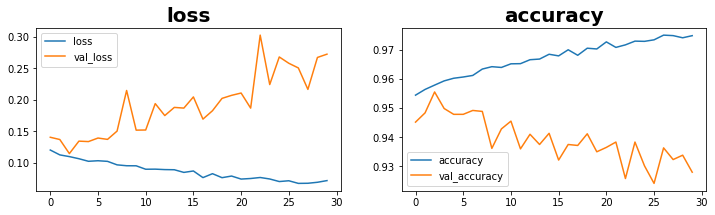

In [ ]:
plot_learning_curve(history, extra_metric='accuracy', include_validation=True);

* The loss seems to be dropping by training for longer epochs on the training 
set
* But if we see the validation loss, it is increasing with each epoch, which definitely mean

## Exercise 7: Data without normalization

Let us train the previous model without any scaling

In [ ]:
model_name_orig = 'simple-dense-2layer'
model_name = f'{model_name_orig}-no-norm'

In [ ]:
model = tf.keras.models.clone_model(tfmodels[model_name_orig])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "simple-dense-2layer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_31 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_32 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_data*255.0, train_labels, batch_size=32, epochs=10)
tfmodels[model_name] = model

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.2748 - accuracy: 0.7707
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5117 - accuracy: 0.8244
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4507 - accuracy: 0.8389
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4182 - accuracy: 0.8514
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3962 - accuracy: 0.8578
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3881 - accuracy: 0.8608
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3724 - accuracy: 0.8658
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3632 - accuracy: 0.8702
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3544 - accuracy: 0.8722
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.349

### Evaluate

In [ ]:
model.evaluate(test_data*255.0, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4481 - accuracy: 0.8503


[0.44813892245292664, 0.8503000140190125]

### Learning Curve

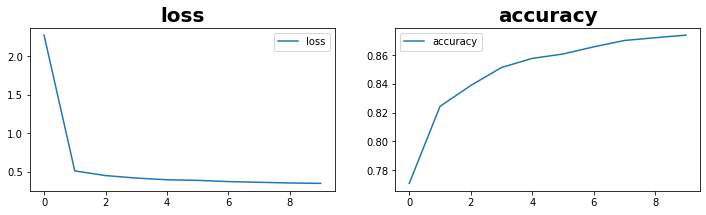

In [ ]:
plot_learning_curve(history, extra_metric='accuracy');

* The loss is higher even on the training set, meaning the model is not able to learn as quickly as it did with the scaled data (Gradient Descent based learning)
* The accuracy has also dropped on the test dataset

## Exercise 8: Custom Callback

In [ ]:
tf.keras.callbacks.EarlyStopping()

In [177]:
class StopEarly(tf.keras.callbacks.Callback):

    def __init__(self, monitor='loss', min_change=0, patience=0):
        self.monitor = monitor
        self.patience = patience
        self.min_change = min_change
        self.last_val = None
        self.num_no_improv = 0
        

    def on_epoch_end(self, epoch, logs={}):

        cur_val = logs.get(self.monitor)

        if self.last_val is None:
            self.last_val = cur_val
            print('change:', 0, 'num_no_improv:', 0, '\n')
            return None

        change = self.last_val - cur_val
        print(f'change: {change:.4f} num_no_improv:{self.num_no_improv}', '\n')

        if change < self.min_change:
            if self.num_no_improv > self.patience:
                self.model.stop_training = True
            else:
                self.num_no_improv += 1
        else:
            self.num_no_improv = 0

        self.last_val = cur_val

In [ ]:
model_name_orig = 'simple-dense-1layer'
model_name = f'{model_name_orig}-earlystop'

In [ ]:
model = tf.keras.models.clone_model(tfmodels[model_name_orig])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "simple-dense-1layer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_27 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [178]:
history = model.fit(train_data, train_labels, epochs=50, callbacks=StopEarly(patience=2, min_change=0.005))
tfmodels[model_name] = model

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1150 - accuracy: 0.9566
change: 0 num_no_improv: 0 

Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1125 - accuracy: 0.9581
change: 0.0024 num_no_improv:0 

Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1105 - accuracy: 0.9582
change: 0.0020 num_no_improv:1 

Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1091 - accuracy: 0.9584
change: 0.0014 num_no_improv:2 

Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1064 - accuracy: 0.9600
change: 0.0026 num_no_improv:3 



In [204]:
from tfutils.evaluate import ClassificationPerformanceComparer

In [199]:
clf_comp = ClassificationPerformanceComparer(models=tfmodels, data=(test_data, test_labels), class_names=CLASS_NAMES)

In [200]:
clf_comp.calculate_predictions()

In [201]:
clf_comp.calculate_metric_comparison_df()

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


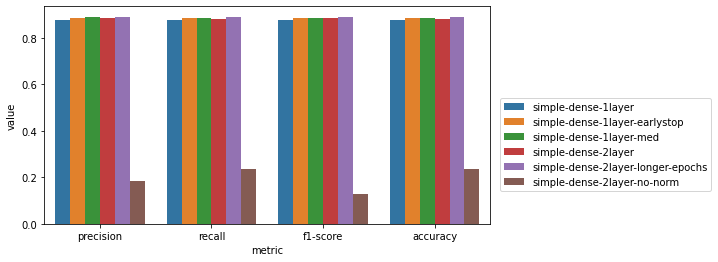

In [202]:
clf_comp.plot_metric_comparison_df()

* The performance on the model trained with non-scaled data is horrible!
* Our best model seems to be `simple-dense-2layer-longer-epochs`, however the model `simple-dense-1layer-med` is far simpler and has comparable performance.